In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from tqdm.notebook import tqdm

In [ ]:
dir_list = list()

dir_list = os.listdir('/content/drive/MyDrive/CP1')

In [ ]:
dir_list

['HAD_A1_UC10_S1',
 'HAD_A1_UC9_S1',
 'HAD_A1_UC12_S1',
 'HAD_A1_UC5_S1',
 'HAD_A1_UC4_S1',
 'HAD_A1_UC7_S1',
 'HAD_A1_UC11_S1',
 'HAD_A1_UC6_S1',
 'HAD_A1_UC13_S1',
 'HAD_A1_UC8_S1',
 'HAD_A2_UC3_S1',
 'HAD_A2_UC1_S1',
 'HAD_A2_UC2_S1',
 'HAD_A2_UC4_S1']

In [ ]:
files = list()

for dir_name in dir_list:
  for _, _, file in tqdm(os.walk(f'/content/drive/MyDrive/CP1/{dir_name}/front_image')):
    file = [(dir_name, filename) for filename in file]
    files.extend(file)
    # print(files)

  # for img_name in files.split()[0]:
  #   print(img_name)

# files = files[:-1]

files

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[('HAD_A1_UC10_S1', '000012.jpg'),
 ('HAD_A1_UC10_S1', '000015.jpg'),
 ('HAD_A1_UC10_S1', '000014.jpg'),
 ('HAD_A1_UC10_S1', '000000.jpg'),
 ('HAD_A1_UC10_S1', '000011.jpg'),
 ('HAD_A1_UC10_S1', '000002.jpg'),
 ('HAD_A1_UC10_S1', '000007.jpg'),
 ('HAD_A1_UC10_S1', '000009.jpg'),
 ('HAD_A1_UC10_S1', '000001.jpg'),
 ('HAD_A1_UC10_S1', '000005.jpg'),
 ('HAD_A1_UC10_S1', '000013.jpg'),
 ('HAD_A1_UC10_S1', '000003.jpg'),
 ('HAD_A1_UC10_S1', '000004.jpg'),
 ('HAD_A1_UC10_S1', '000008.jpg'),
 ('HAD_A1_UC10_S1', '000010.jpg'),
 ('HAD_A1_UC10_S1', '000006.jpg'),
 ('HAD_A1_UC10_S1', '000017.jpg'),
 ('HAD_A1_UC10_S1', '000024.jpg'),
 ('HAD_A1_UC10_S1', '000040.jpg'),
 ('HAD_A1_UC10_S1', '000041.jpg'),
 ('HAD_A1_UC10_S1', '000027.jpg'),
 ('HAD_A1_UC10_S1', '000030.jpg'),
 ('HAD_A1_UC10_S1', '000038.jpg'),
 ('HAD_A1_UC10_S1', '000043.jpg'),
 ('HAD_A1_UC10_S1', '000025.jpg'),
 ('HAD_A1_UC10_S1', '000032.jpg'),
 ('HAD_A1_UC10_S1', '000021.jpg'),
 ('HAD_A1_UC10_S1', '000019.jpg'),
 ('HAD_A1_UC10_S1', 

In [ ]:
filenames = list()

for dir_name, img_num in files:
  filenames.append((dir_name, img_num.split('.')[0]))

filenames = sorted(filenames)

filenames

[('HAD_A1_UC10_S1', '000000'),
 ('HAD_A1_UC10_S1', '000001'),
 ('HAD_A1_UC10_S1', '000002'),
 ('HAD_A1_UC10_S1', '000003'),
 ('HAD_A1_UC10_S1', '000004'),
 ('HAD_A1_UC10_S1', '000005'),
 ('HAD_A1_UC10_S1', '000006'),
 ('HAD_A1_UC10_S1', '000007'),
 ('HAD_A1_UC10_S1', '000008'),
 ('HAD_A1_UC10_S1', '000009'),
 ('HAD_A1_UC10_S1', '000010'),
 ('HAD_A1_UC10_S1', '000011'),
 ('HAD_A1_UC10_S1', '000012'),
 ('HAD_A1_UC10_S1', '000013'),
 ('HAD_A1_UC10_S1', '000014'),
 ('HAD_A1_UC10_S1', '000015'),
 ('HAD_A1_UC10_S1', '000016'),
 ('HAD_A1_UC10_S1', '000017'),
 ('HAD_A1_UC10_S1', '000018'),
 ('HAD_A1_UC10_S1', '000019'),
 ('HAD_A1_UC10_S1', '000020'),
 ('HAD_A1_UC10_S1', '000021'),
 ('HAD_A1_UC10_S1', '000022'),
 ('HAD_A1_UC10_S1', '000023'),
 ('HAD_A1_UC10_S1', '000024'),
 ('HAD_A1_UC10_S1', '000025'),
 ('HAD_A1_UC10_S1', '000026'),
 ('HAD_A1_UC10_S1', '000027'),
 ('HAD_A1_UC10_S1', '000028'),
 ('HAD_A1_UC10_S1', '000029'),
 ('HAD_A1_UC10_S1', '000030'),
 ('HAD_A1_UC10_S1', '000031'),
 ('HAD_A

In [ ]:
len(filenames)

1235

In [ ]:
plt.rcParams['figure.dpi'] = 144

In [ ]:
width = 480
height = 270

In [ ]:
def get_bbox_label(dirname, filename):
  FILEPATH = f'/content/drive/MyDrive/CP1/{dirname}/front_meta/{filename}.json'
  with open(FILEPATH, 'r') as f:
    json_data = json.load(f)

  annot_3d = json_data['OBJECT_LIST'][0]['3D_LIST']
  annot_2d = json_data['OBJECT_LIST'][0]['2D_LIST']

  boxes = list()
  labels = list()

  for member in annot_3d:
    box = (member['BOX'][0] / 4, member['BOX'][1] / 4, member['BOX'][2] / 4, member['BOX'][3] / 4)
    label = member['CLASS']

    boxes.append(box)

    if label == 'VEHICLE':
      labels.append(0)
    # elif label == 'VEHICLE_SEDAN':
    #   labels.append(1)
    # elif label == 'VEHICLE_BUS':
    #   labels.append(2)
    # elif label == 'VEHICLE_SUV':
    #   labels.append(3)
    else:
      labels.append(2)

  for member in annot_2d:
    if 'BOX' in member:
      box = (member['BOX'][0] / 4, member['BOX'][1] / 4, member['BOX'][2] / 4, member['BOX'][3] / 4)
      label = member['CLASS']

      boxes.append(box)

      if label == 'TRAFFIC_SIGN':
        labels.append(1)
      else:
        labels.append(2)

  return boxes, labels

In [ ]:
import tensorflow as tf
import keras as K

In [ ]:
def load_img_to_array(dirname, filename):
  FILEPATH = f'/content/drive/MyDrive/CP1/{dirname}/front_image/{filename}.jpg'

  img = K.preprocessing.image.load_img(FILEPATH, target_size=(height, width))
  img_arr = K.preprocessing.image.img_to_array(img)

  return img_arr / 255

In [ ]:
targets = list()
labels = list()
images = list()

for dirname, filename in tqdm(filenames):
  target, label = get_bbox_label(dirname, filename)
  image = load_img_to_array(dirname, filename)

  targets.extend(target)
  labels.extend(label)

  for i in range(len(target)):
    images.append(image)

  0%|          | 0/1235 [00:00<?, ?it/s]

In [ ]:
len(images)

7827

In [ ]:
len(targets)

7827

In [ ]:
len(labels)

7827

In [ ]:
def get_iou(bbox1, bbox2):
  assert bbox1['x1'] < bbox1['x2']
  assert bbox1['y1'] < bbox1['y2']

  assert bbox2['x1'] < bbox2['x2']
  assert bbox2['y1'] < bbox2['y2']

  x_left = max(bbox1['x1'], bbox2['x1'])
  y_top = max(bbox1['y1'], bbox2['y1'])
  x_right = min(bbox1['x2'], bbox2['x2'])
  y_bottom = min(bbox1['y2'], bbox2['y2'])

  if x_right < x_left or y_bottom < y_top:
    return 0.0

  intersection_area = (x_right - x_left) * (y_bottom - y_top)
  bb1_area = (bbox1['x2'] - bbox1['x1']) * (bbox1['y2'] - bbox1['y1'])
  bb2_area = (bbox2['x2'] - bbox2['x1']) * (bbox2['y2'] - bbox2['y1'])
  iou = intersection_area / float(bb1_area + bb2_area - intersection_area)

  assert iou >= 0.0
  assert iou <= 1.0

  return iou

In [ ]:
import random

train_images = list()
train_targets = list()
train_labels = list()

train_ids = random.sample(range(0, 6000), 800)

for idx in train_ids:
  train_images.append(images[idx])
  train_targets.append(targets[idx])
  train_labels.append(labels[idx])

In [ ]:
train_targets

[(204.5, 92.0, 230.0, 110.25),
 (70.0, 96.5, 94.25, 106.75),
 (184.25, 92.5, 201.75, 106.75),
 (201.5, 93.25, 209.5, 101.5),
 (176.5, 91.0, 195.0, 100.75),
 (241.0, 79.0, 250.0, 86.25),
 (225.5, 87.25, 234.5, 97.25),
 (228.25, 93.25, 265.25, 122.25),
 (100.5, 100.75, 134.75, 121.75),
 (230.0, 93.0, 234.25, 98.25),
 (235.5, 87.5, 246.0, 91.75),
 (68.75, 0.0, 109.5, 31.25),
 (207.0, 92.5, 229.5, 111.5),
 (259.75, 68.25, 268.0, 70.25),
 (250.75, 73.0, 261.5, 79.75),
 (167.75, 93.0, 195.5, 113.25),
 (227.25, 75.25, 235.25, 77.75),
 (230.5, 90.75, 255.25, 113.25),
 (199.0, 92.0, 223.5, 112.0),
 (250.25, 73.75, 261.25, 80.75),
 (245.25, 89.75, 250.0, 93.25),
 (219.0, 90.5, 229.25, 99.75),
 (230.0, 93.0, 234.25, 98.25),
 (215.75, 87.75, 229.5, 101.5),
 (150.25, 95.0, 186.5, 121.0),
 (213.75, 92.0, 227.5, 103.25),
 (215.0, 92.5, 228.5, 103.25),
 (171.25, 87.25, 191.0, 102.25),
 (198.25, 34.5, 223.0, 44.75),
 (21.0, 117.0, 76.5, 138.25),
 (122.5, 66.0, 134.5, 72.75),
 (206.5, 89.0, 217.0, 94.75

In [ ]:
val_images = list()
val_targets = list()
val_labels = list()

val_ids = random.sample(range(6000, 7828), 150)

for idx in val_ids:
  val_images.append(images[idx])
  val_targets.append(targets[idx])
  val_labels.append(labels[idx])

In [ ]:
train_images = np.array(train_images)
train_targets = np.array(train_targets)
train_labels = np.array(train_labels)

val_images = np.array(val_images)
val_targets = np.array(val_targets)
val_labels = np.array(val_labels)

In [ ]:
train_images[799]

array([[[0.6784314 , 0.75686276, 0.9019608 ],
        [0.6784314 , 0.7490196 , 0.90588236],
        [0.6862745 , 0.74509805, 0.90588236],
        ...,
        [0.7137255 , 0.7137255 , 0.74509805],
        [0.57254905, 0.62352943, 0.6901961 ],
        [0.44705883, 0.5058824 , 0.59607846]],

       [[0.6745098 , 0.73333335, 0.85490197],
        [0.67058825, 0.7294118 , 0.85882354],
        [0.6745098 , 0.7294118 , 0.8666667 ],
        ...,
        [0.6666667 , 0.654902  , 0.69803923],
        [0.69411767, 0.72156864, 0.78431374],
        [0.4862745 , 0.5647059 , 0.6627451 ]],

       [[0.67058825, 0.73333335, 0.8745098 ],
        [0.6627451 , 0.73333335, 0.88235295],
        [0.6666667 , 0.7372549 , 0.89411765],
        ...,
        [0.7058824 , 0.6666667 , 0.7019608 ],
        [0.7372549 , 0.7294118 , 0.7490196 ],
        [0.4862745 , 0.54509807, 0.61960787]],

       ...,

       [[0.4392157 , 0.4627451 , 0.5254902 ],
        [0.4117647 , 0.43529412, 0.49803922],
        [0.36862746, 0

In [ ]:
train_labels

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [ ]:
val_labels

array([0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input

In [ ]:
classes = ['VEHICLE', 'TRAFFIC_SIGN']
num_classes = len(classes)

# Build the Model

input_shape = (height, width, 3)
input_layer = Input(input_shape)

In [ ]:
# Base Model

base_layers = Conv2D(16, 3, padding='same', activation='relu', name='base_1')(input_layer)
base_layers = MaxPooling2D(name='base_2')(base_layers)
base_layers = Conv2D(32, 3, padding='same', activation='relu', name='base_3')(base_layers)
base_layers = MaxPooling2D(name='base_4')(base_layers)
base_layers = Conv2D(64, 3, padding='same', activation='relu', name='base_5')(base_layers)
base_layers = MaxPooling2D(name='base_6')(base_layers)
base_layers = Conv2D(128, 3, padding='same', activation='relu', name='base_7')(base_layers)
base_layers = MaxPooling2D(name='base_8')(base_layers)
base_layers = Conv2D(256, 3, padding='same', activation='relu', name='base_9')(base_layers)
base_layers = MaxPooling2D(name='base_10')(base_layers)
base_layers = Flatten(name='base_11')(base_layers)

# Classification Model

classifier_layers = Dense(128, activation='relu', name='class_1')(base_layers)
classifier_layers = Dense(1, activation='sigmoid', name='class_head')(classifier_layers)

# BBOX Regression Model

bbox_layers = Dense(512, activation='relu', name='bbox_1')(base_layers)
bbox_layers = Dense(256, activation='relu', name='bbox_2')(bbox_layers)
bbox_layers = Dense(128, activation='relu', name='bbox_3')(bbox_layers)
bbox_layers = Dense(64, activation='relu', name='bbox_4')(bbox_layers)
bbox_layers = Dense(32, activation='relu', name='bbox_5')(bbox_layers)
bbox_layers = Dense(4, activation='relu', name='bbox_head')(bbox_layers)

In [ ]:
model = tf.keras.Model(input_layer, outputs = [classifier_layers, bbox_layers])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 270, 480, 3  0           []                               
                                )]                                                                
                                                                                                  
 base_1 (Conv2D)                (None, 270, 480, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 base_2 (MaxPooling2D)          (None, 135, 240, 16  0           ['base_1[0][0]']                 
                                )                                                             

In [ ]:
losses = {"class_head":tf.keras.losses.BinaryCrossentropy(from_logits=True), "bbox_head":tf.keras.losses.MSE}

In [ ]:
model.compile(loss=losses, optimizer='Adam', metrics=['accuracy'])

In [ ]:
trainTargets = {
    "class_head": train_labels,
    "bbox_head": train_targets
}

validationTargets = {
    "class_head": val_labels,
    "bbox_head": val_targets
}

In [ ]:
history = model.fit(train_images, trainTargets,
             validation_data=(val_images, validationTargets),
             batch_size=32,
             epochs=20,
             shuffle=True,
             verbose=1)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


25/25 [==============================] - 13s 300ms/step - loss: 14340.5967 - class_head_loss: 2.1277 - bbox_head_loss: 14338.4697 - class_head_accuracy: 0.6762 - bbox_head_accuracy: 0.0000e+00 - val_loss: 8021.6968 - val_class_head_loss: 0.9547 - val_bbox_head_loss: 8020.7417 - val_class_head_accuracy: 0.7467 - val_bbox_head_accuracy: 0.0000e+00
Epoch 2/20
25/25 [==============================] - 6s 250ms/step - loss: 6632.6777 - class_head_loss: 1.0626 - bbox_head_loss: 6631.6143 - class_head_accuracy: 0.6513 - bbox_head_accuracy: 0.7775 - val_loss: 5305.0654 - val_class_head_loss: 1.9191 - val_bbox_head_loss: 5303.1465 - val_class_head_accuracy: 0.7467 - val_bbox_head_accuracy: 0.9600
Epoch 3/20
25/25 [==============================] - 6s 249ms/step - loss: 6880.5049 - class_head_loss: 1.3802 - bbox_head_loss: 6879.1245 - class_head_accuracy: 0.6775 - bbox_head_accuracy: 0.8838 - val_loss: 6017.2773 - val_class_head_loss: 0.8199 - val_bbox_head_loss: 6016.4575 - val_class_head_accura

In [ ]:
class_pred, bbox_pred = model.predict(val_images[1])

ValueError: ignored

In [ ]:
val_images[1].shape

(270, 480, 3)

In [ ]:
val_targets[100]

array([236.25,  91.  , 243.75,  98.  ])

In [ ]:
bbox_pred[100]

array([200.72028,  96.17633, 225.63365,   0.     ], dtype=float32)

In [ ]:
bbox_pred

array([[198.9525  ,  95.32573 , 223.63809 ,   0.      ],
       [200.63899 ,  96.142105, 225.55643 ,   0.      ],
       [202.00803 ,  96.78221 , 227.07521 ,   0.      ],
       [200.77383 ,  96.20924 , 225.70302 ,   0.      ],
       [202.70131 ,  97.12343 , 227.87231 ,   0.      ],
       [200.40773 ,  96.05595 , 225.31189 ,   0.      ],
       [201.88435 ,  96.71913 , 226.93597 ,   0.      ],
       [200.29924 ,  95.97712 , 225.17296 ,   0.      ],
       [200.70491 ,  96.1318  , 225.60306 ,   0.      ],
       [203.1674  ,  97.35196 , 228.39769 ,   0.      ],
       [201.86974 ,  96.72158 , 226.92047 ,   0.      ],
       [200.8414  ,  96.235374, 225.77145 ,   0.      ],
       [199.95836 ,  95.82888 , 224.79759 ,   0.      ],
       [199.80945 ,  95.74004 , 224.6066  ,   0.      ],
       [201.00282 ,  96.34715 , 225.98674 ,   0.      ],
       [202.04965 ,  96.787285, 227.10912 ,   0.      ],
       [199.66998 ,  95.6847  , 224.46834 ,   0.      ],
       [201.37799 ,  96.50408 ,

In [ ]:
def draw_on_image(image, bbox):
    img = tf.keras.utils.array_to_img(image)
    draw = ImageDraw.Draw(img)

    draw = ImageDraw.Draw(img)
    x1, y1, x2, y2 = bbox[0], bbox[1], bbox[2], bbox[3]
    draw.rectangle(xy=((x1,y1),(x2,y2)))

    return img

0


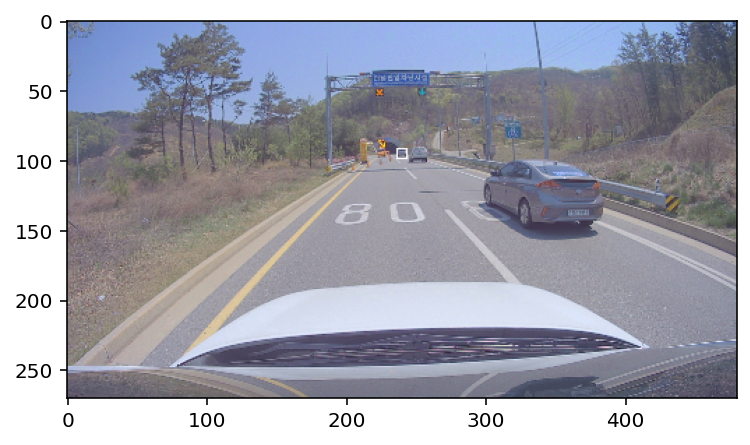

In [ ]:
img = draw_on_image(val_images[100], val_targets[100])

print(val_labels[4])
plt.imshow(img);

0.23978336


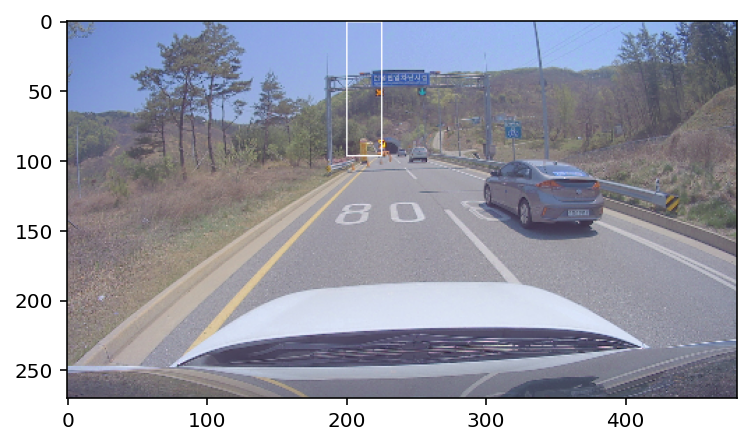

In [ ]:
img = draw_on_image(val_images[100], bbox_pred[100])

print(max(class_pred[1]))
plt.imshow(img);

In [ ]:
class_pred

array([[0.27240655],
       [0.23978336],
       [0.35515   ],
       [0.25640446],
       [0.14809895],
       [0.23457609],
       [0.33171856],
       [0.2948613 ],
       [0.12993218],
       [0.15071686],
       [0.23272671],
       [0.2767004 ],
       [0.2392816 ],
       [0.24555285],
       [0.21810806],
       [0.3308114 ],
       [0.2572759 ],
       [0.2830075 ],
       [0.34625244],
       [0.21650052],
       [0.18649375],
       [0.3250325 ],
       [0.17820176],
       [0.2521512 ],
       [0.31804636],
       [0.24564621],
       [0.13567373],
       [0.27949148],
       [0.24817562],
       [0.23270068],
       [0.34693953],
       [0.24814625],
       [0.24127343],
       [0.15459082],
       [0.2991326 ],
       [0.24729513],
       [0.3290417 ],
       [0.20823139],
       [0.2572759 ],
       [0.3312377 ],
       [0.32362455],
       [0.23457609],
       [0.15576166],
       [0.35274324],
       [0.3321483 ],
       [0.2901337 ],
       [0.19448158],
       [0.207

In [ ]:
train_targets[99]

array([199.  ,  82.5 , 203.5 ,  84.25])